# Audio Processing in Python



# Some Terminologies

Before starting, let us understand some terminologies related to audio and signal processing which will help in understanding and following this notebook in a better way.

* Analog speech signal : The speech which usually is uttered by humans and is propogated through air.
* Digital speech signal : The speech (in terms of samples) after performing analog-to-digital conversion using an ADC device. In this form, speech signal is in form of digitized samples.
* Frequency of a signal : The number of cycles a signal repeats in 1 second duration.
* Amplitude of a signal : It is related to loudness of speech (for speech signal). Depending on the type of the signal, it can be energy, voltage etc.

### Processing a Noisy and Clean Signal

- There are two noisy and clean signals in the same folder
- Generate MFCC of both the Signals and report the differences

In [3]:
!pip install librosa matplotlib
import librosa
import matplotlib.pyplot as plt
import numpy as np

# Load audio signals
clean_file = '/content/Clean-Signal.wav'
noisy_file = '/content/Noisy-Signal.wav'

# Load the audio files
clean_signal, sr_clean = librosa.load(clean_file, sr=None)
noisy_signal, sr_noisy = librosa.load(noisy_file, sr=None)

# Ensure both signals have the same sample rate
if sr_clean != sr_noisy:
    raise ValueError("Sample rates of the signals are different.")


In [4]:
# Define parameters for MFCC
n_mfcc = 13  # Number of MFCC coefficients to extract

# Compute MFCC for clean and noisy signals
mfcc_clean = librosa.feature.mfcc(y=clean_signal, sr=sr_clean, n_mfcc=n_mfcc)
mfcc_noisy = librosa.feature.mfcc(y=noisy_signal, sr=sr_noisy, n_mfcc=n_mfcc)


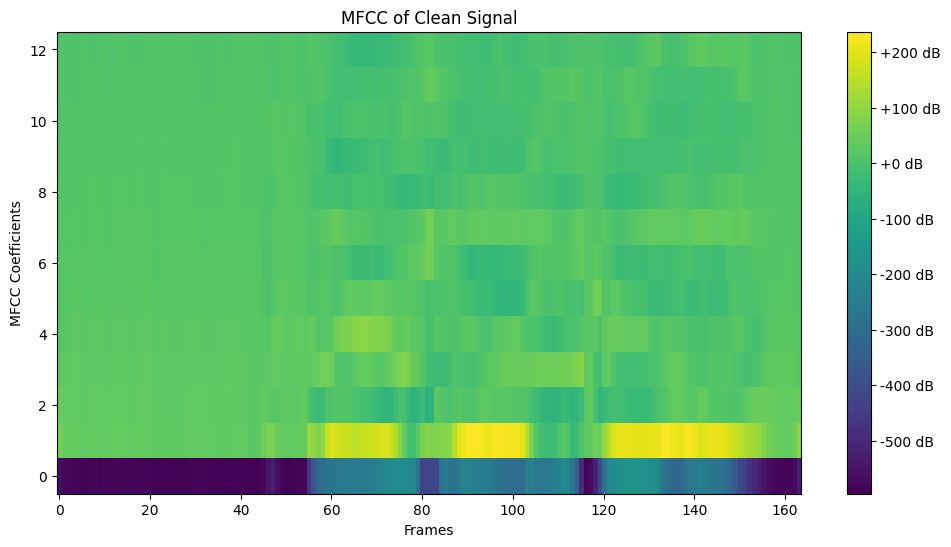

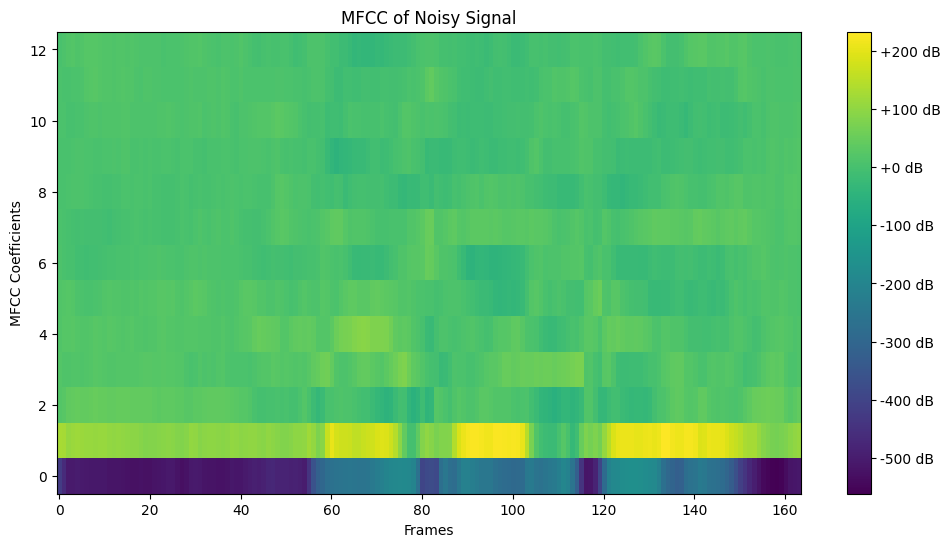

In [5]:
# Plot MFCCs
def plot_mfcc(mfcc, title):
    plt.figure(figsize=(12, 6))
    plt.imshow(mfcc, aspect='auto', origin='lower', cmap='viridis')
    plt.title(title)
    plt.colorbar(format='%+2.0f dB')
    plt.ylabel('MFCC Coefficients')
    plt.xlabel('Frames')
    plt.show()

# Plot MFCCs for both clean and noisy signals
plot_mfcc(mfcc_clean, 'MFCC of Clean Signal')
plot_mfcc(mfcc_noisy, 'MFCC of Noisy Signal')


### Trimming and Processing the Signal
- The >Example.wav file contains is of a very large length.
- Plot the MFCC
- Trim the first 4 Seconds of Audio and plot the MFCC
- Observe the Changes



In [6]:
import librosa
import matplotlib.pyplot as plt

# Load the audio file
audio_file = '/content/Example.wav'
audio_signal, sr = librosa.load(audio_file, sr=None)

# Define parameters for MFCC
n_mfcc = 13

# Compute MFCC for the full audio signal
mfcc_full = librosa.feature.mfcc(y=audio_signal, sr=sr, n_mfcc=n_mfcc)


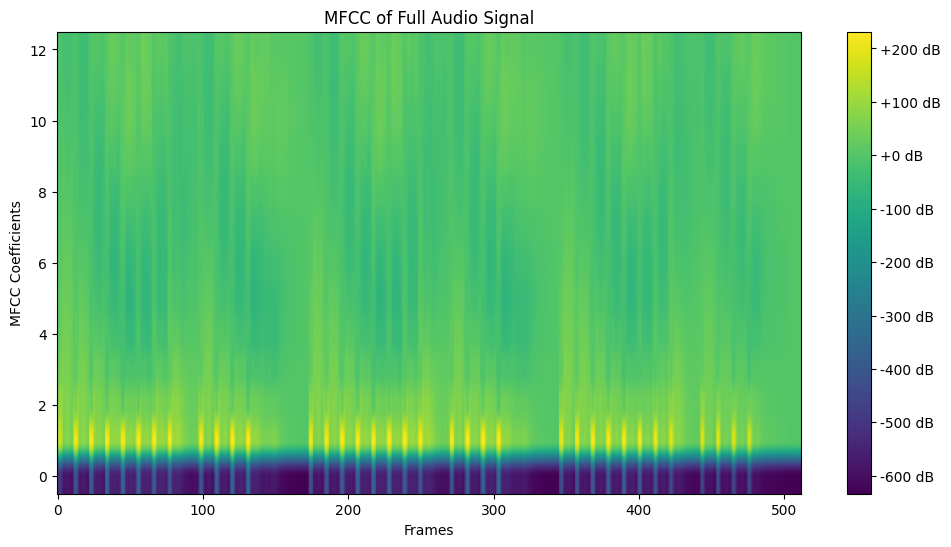

In [7]:
def plot_mfcc(mfcc, title):
    plt.figure(figsize=(12, 6))
    plt.imshow(mfcc, aspect='auto', origin='lower', cmap='viridis')
    plt.title(title)
    plt.colorbar(format='%+2.0f dB')
    plt.ylabel('MFCC Coefficients')
    plt.xlabel('Frames')
    plt.show()

# Plot MFCC of the full audio
plot_mfcc(mfcc_full, 'MFCC of Full Audio Signal')


In [8]:
# Calculate the number of samples for 4 seconds
samples_per_second = sr
num_samples_4_seconds = int(4 * samples_per_second)

# Trim the first 4 seconds
trimmed_signal = audio_signal[num_samples_4_seconds:]

# Compute MFCC for the trimmed audio signal
mfcc_trimmed = librosa.feature.mfcc(y=trimmed_signal, sr=sr, n_mfcc=n_mfcc)


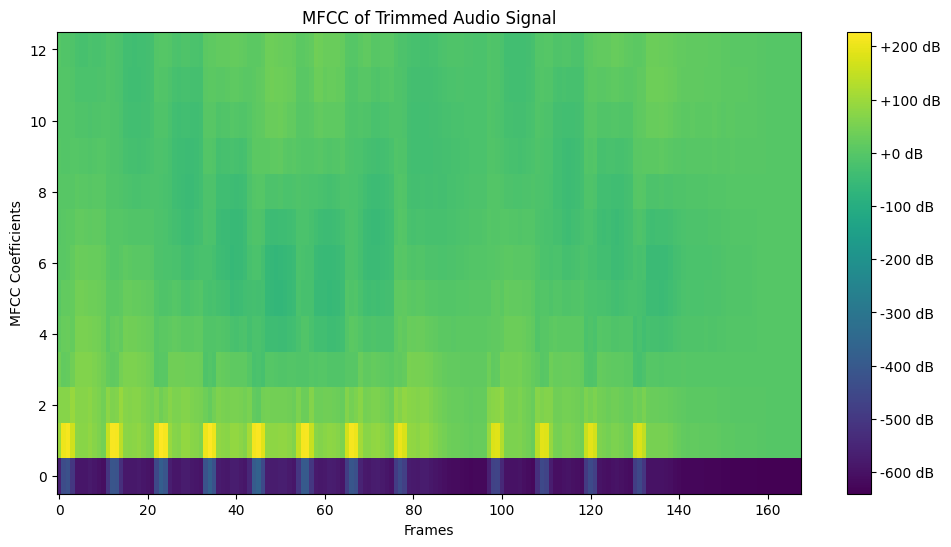

In [9]:
# Plot MFCC of the trimmed audio
plot_mfcc(mfcc_trimmed, 'MFCC of Trimmed Audio Signal')
